In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from blimpy import read_header, Waterfall, Filterbank

import sys, os, glob, errno
import csv
import json
import h5py

sys.path.append("../../../setigen/")
import setigen as stg

tsamp = 1.4316557653333333
fch1 = 6000.464843051508
df = -1.3969838619232178e-06

fchans = 1024
tchans = 32
fs = np.arange(fch1, fch1 + fchans*df, df)
ts = np.arange(0, tchans*tsamp, tsamp)


In [2]:
real_noise = np.load('real_noise_dists.npy')
means_dist = real_noise[:,0]
stds_dist = real_noise[:,1]
mins_dist = real_noise[:,2]

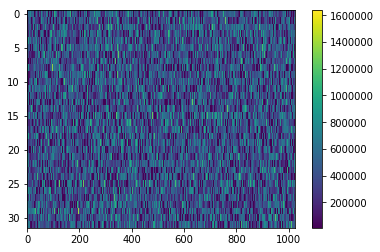

In [18]:
def choose_from_dist(dist, shape):
    return dist[np.random.randint(0, len(dist), shape)]

def make_normal(means_dist, stds_dist, mins_dist, shape):
    means = choose_from_dist(means_dist, shape)
    stds = choose_from_dist(stds_dist, shape)
    mins = choose_from_dist(mins_dist, shape)
    means = np.maximum(means, stds)
    return means, stds, mins

noise_mean, noise_std, noise_min = make_normal(means_dist, stds_dist, mins_dist, 1)
noise_frame = np.maximum(np.random.normal(noise_mean, noise_std, [tchans, fchans]), noise_min)
frame = noise_frame

plt.imshow(noise_frame, aspect='auto')
plt.colorbar()
plt.show()


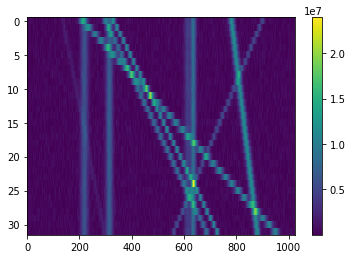

In [87]:
frame = np.copy(noise_frame)

sig_num = 10

for i in range(sig_num):
    snr = np.random.uniform(25, 250)
#     print(snr)
    
#     snr = np.power(10, sig_db / 10)
    level = noise_std * snr / np.sqrt(tchans)
    start_index = np.random.randint(0, fchans)
    
    if np.random.rand() > 0.5:
        end_index = np.random.randint(0, fchans)
        
    else:
        end_index = start_index
    drift_rate = (end_index - start_index) * df / (tsamp * tchans)
    
    line_width = np.random.uniform(5, 10) * np.abs(df)
#     line_width = 5*np.abs(df)
    
    signal = stg.generate(ts,
                          fs,
                          stg.constant_path(f_start=fs[start_index], drift_rate=drift_rate),
                          stg.constant_t_profile(level=level),
                          stg.gaussian_f_profile(width=line_width),
                          stg.constant_bp_profile(level=1.0))

    sig_info = np.array([start_index, end_index, line_width, snr, 0])
    frame += signal

plt.imshow(frame, aspect='auto')
plt.colorbar()
plt.show()
    


In [48]:
np.random.rand()

0.9209443461624937

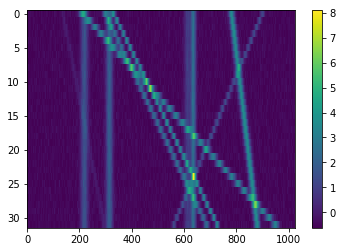

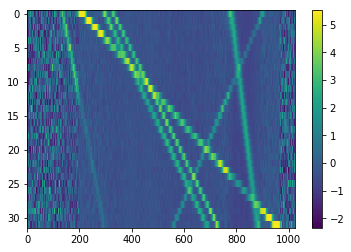

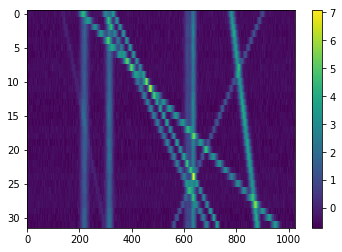

In [91]:
normalized = np.copy(frame)
normalized -= np.mean(normalized, keepdims=True)
normalized /= np.std(normalized, keepdims=True)

plt.imshow(normalized, aspect='auto')
plt.colorbar()
plt.show()

normalized = np.copy(frame)
normalized -= np.mean(normalized, axis=0, keepdims=True)
normalized /= np.std(normalized, axis=0, keepdims=True)

plt.imshow(normalized, aspect='auto')
plt.colorbar()
plt.show()

normalized = np.copy(frame)
normalized -= np.mean(normalized, axis=1, keepdims=True)
normalized /= np.std(normalized, axis=1, keepdims=True)

plt.imshow(normalized, aspect='auto')
plt.colorbar()
plt.show()

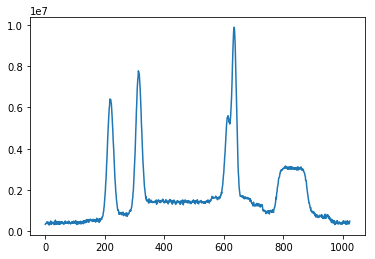

In [92]:
plt.plot(np.mean(frame, axis=0))
plt.show()

In [89]:
2*10*np.sqrt(2*np.log(250/np.sqrt(32)))/1024

0.053763063956084496

In [9]:
a = (1,2)
import numpy as np
np.random.uniform(a[0], a[1])

1.2403386850608749

In [23]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [25]:
'%.01f' % 0.2

'0.2'